# Gaussian Mixture Model
In Gaussian Mixture Model (GMM), the data is assumed to be generated from a mixture of a finite number of Gaussian distribution. Thus, in a GMM with $K$ components, the distribution of the observed data $\mathbf{x}$ is modelled as
$$P(\mathbf{x}) = \sum_{k=1}^{K}\pi_k\mathcal{N}(\mathbf{x};\mu_k, \Sigma_k)$$
where $\mathcal{N}(\mathbf{x};\mu_k, \Sigma_k)$ denotes a multivariate Gaussian
distribution with mean vector $\mu_k$ and covariance matrix $\Sigma_k$ and $\pi_k$ is the mixing probability of $\mathcal{N}(\mathbf{x};\mu_k, \Sigma_k)$. Note that $0\le\pi_k\le 1$ for all $k=1, \ldots, K$ and $\sum_{k=1}^K \pi_k = 1$.

The Scikit-learn class <em>sklearn.mixture.GaussianMixture</em> implements a GMM fitting algorithm. It's complete documentation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).

## GMM Fitting Example

### Importing the neccessary modules

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.utils.extmath import row_norms
from sklearn.datasets._samples_generator import make_blobs

### Preparing the data

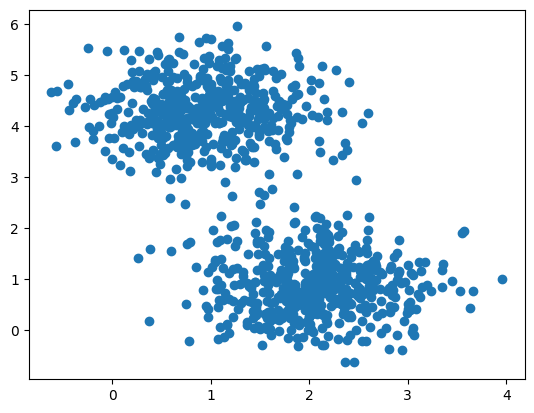

In [18]:
X, y_true = make_blobs(n_samples=1000, centers=2, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1])

### Fitting the model

In [19]:
gm = GaussianMixture(n_components=2,
                     covariance_type='full', #{‘full’, ‘tied’, ‘diag’, ‘spherical’}
                     init_params='kmeans', #{‘kmeans’, ‘k-means++’, ‘random’, ‘random_from_data’}
                     weights_init=None,
                     means_init=None,
                     precisions_init=None,
                     random_state=0)
gm.fit(X)

GaussianMixture(n_components=2, random_state=0)

### Prediction

In [20]:
print(gm.predict(X[:5, :]))
print(y_true[:5])

[0 0 0 1 1]
[0 0 0 1 1]


In [5]:
print(gm.predict_proba(X[:5, :]))

[[9.99999945e-01 5.47023504e-08]
 [9.99883922e-01 1.16077706e-04]
 [9.99807078e-01 1.92921935e-04]
 [3.48036937e-08 9.99999965e-01]
 [1.42998557e-08 9.99999986e-01]]


In [21]:
gm.sample(n_samples=5)

(array([[1.72963827, 4.89794391],
        [1.95343736, 3.11547282],
        [2.15030527, 4.01977518],
        [1.34813158, 1.2652697 ],
        [1.53322036, 2.44315149]]),
 array([0, 0, 0, 1, 1]))

### Evaluation of the learned GMM

In [22]:
gm.bic(X)

4994.4395396439295

In [23]:
gm.score(X)

-2.459227115787563

## Comparison for GMM using Different Covariance Types
The original code can be found [here](https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py).

### Importing the modules

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

### Function to draw ellipsiods

In [25]:
colors = ["navy", "turquoise", "darkorange"]


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == "full":
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == "tied":
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == "diag":
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == "spherical":
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        ell = mpl.patches.Ellipse(
            gmm.means_[n, :2], v[0], v[1], 180 + angle, color=color
        )
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect("equal", "datalim")


### Preparing the dataset

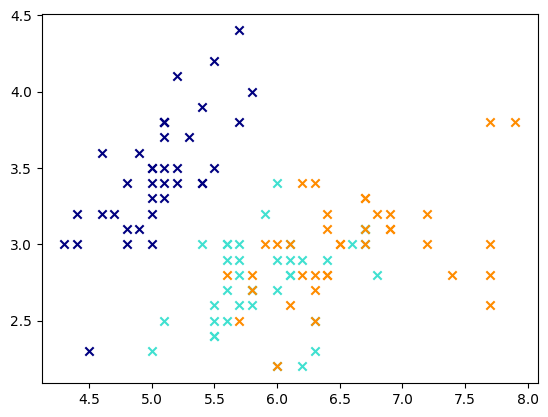

In [26]:
iris = datasets.load_iris()

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))


X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))

for n, color in enumerate(colors):
        data = X_train[y_train == n]
        plt.scatter(data[:, 0], data[:, 1], marker="x", color=color)

### Fitting GMM using different types of covariance

<ipython-input-25-1df0fc9e2589>:19: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = mpl.patches.Ellipse(
<ipython-input-25-1df0fc9e2589>:19: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = mpl.patches.Ellipse(
<ipython-input-25-1df0fc9e2589>:19: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = mpl.patches.Ellipse(
<ipython-input-25-1df0fc9e2589>:19: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = mpl.patches.Ellip

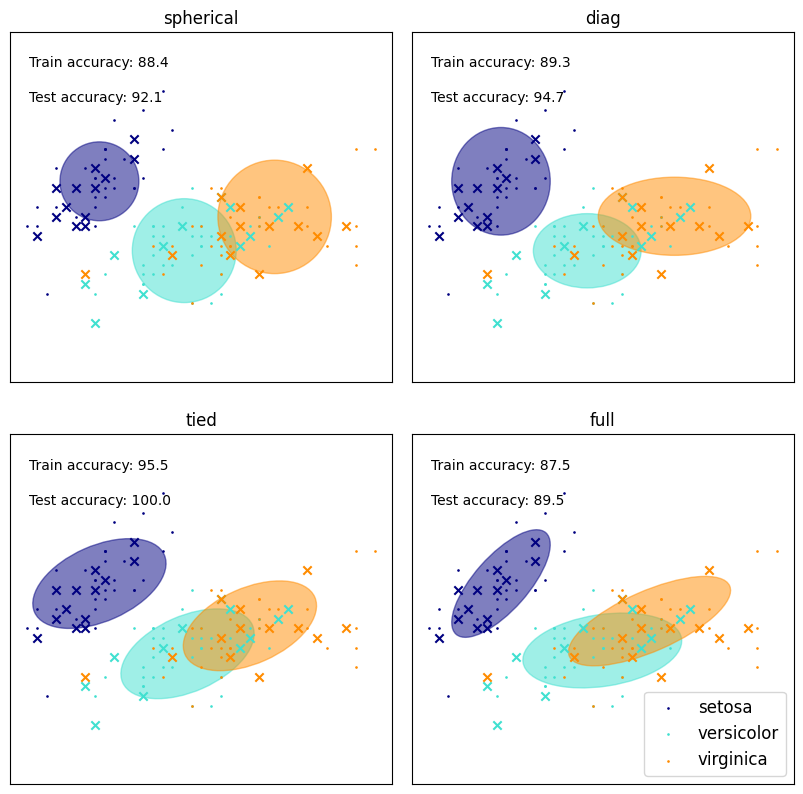

In [27]:
# Try GMMs using different types of covariances.
estimators = {
    cov_type: GaussianMixture(
        n_components=n_classes, covariance_type=cov_type, max_iter=20, random_state=0
    )
    for cov_type in ["spherical", "diag", "tied", "full"]
}

n_estimators = len(estimators)

plt.figure(figsize=(4 * n_estimators // 2, 8))
plt.subplots_adjust(
    bottom=0.01, top=0.95, hspace=0.15, wspace=0.05, left=0.01, right=0.99
)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array(
        [X_train[y_train == i].mean(axis=0) for i in range(n_classes)]
    )

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(
            data[:, 0], data[:, 1], s=0.8, color=color, label=iris.target_names[n]
        )
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker="x", color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, "Train accuracy: %.1f" % train_accuracy, transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, "Test accuracy: %.1f" % test_accuracy, transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc="lower right", prop=dict(size=12))


plt.show()

## GMM Model Selection
The original code can be found [here](https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html#sphx-glr-auto-examples-mixture-plot-gmm-selection-py).

### Importing the modules

In [28]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

### Generating the dataset

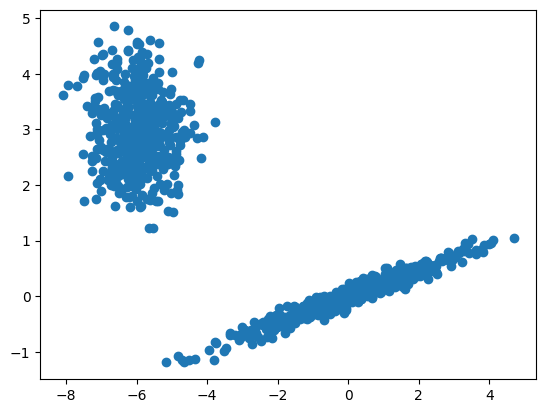

In [29]:
# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0.0, -0.1], [1.7, 0.4]])
X = np.r_[
    np.dot(np.random.randn(n_samples, 2), C),
    0.7 * np.random.randn(n_samples, 2) + np.array([-6, 3]),
]
plt.scatter(X[:, 0], X[:, 1])

### Fitting different models

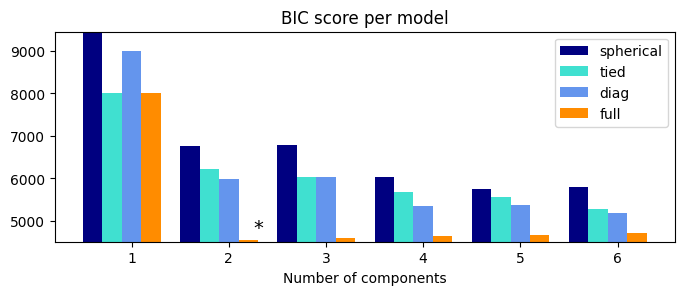

In [30]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ["spherical", "tied", "diag", "full"]
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(
            n_components=n_components, covariance_type=cv_type
        )
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(["navy", "turquoise", "cornflowerblue", "darkorange"])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + 0.2 * (i - 2)
    bars.append(
        plt.bar(
            xpos,
            bic[i * len(n_components_range) : (i + 1) * len(n_components_range)],
            width=0.2,
            color=color,
        )
    )
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(), bic.max()])
plt.title("BIC score per model")
xpos = (
    np.mod(bic.argmin(), len(n_components_range))
    + 0.65
    + 0.2 * np.floor(bic.argmin() / len(n_components_range))
)
plt.text(xpos, bic.min() * 0.97 + 0.03 * bic.max(), "*", fontsize=14)
spl.set_xlabel("Number of components")
spl.legend([b[0] for b in bars], cv_types)

### Plotting the best model

<ipython-input-31-f6c97fca0e76>:13: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = mpl.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color=color)


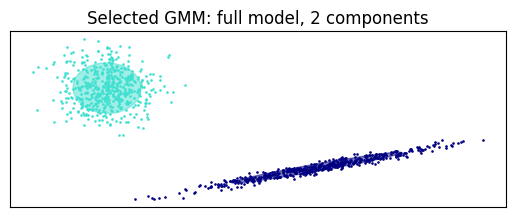

In [31]:
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_, color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180.0 * angle / np.pi  # convert to degrees
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title(
    f"Selected GMM: {best_gmm.covariance_type} model, "
    f"{best_gmm.n_components} components"
)
plt.subplots_adjust(hspace=0.35, bottom=0.02)
plt.show()